# Datawrangling Capstone: DJI Time Series

Source: https://archive.ics.uci.edu/ml/datasets/dow+jones+index
Dr. Michael Brown, michael.brown '@' umuc.edu, University of Maryland University College

## Importing Packages 

In [1]:
# Importing packages 
import pandas as pd
import matplotlib.pyplot as plt


## Loading Data

In [2]:
# Used pd.read_csv() 
dji = pd.read_csv('dow_jones_index.data')

## Exploring The Data

In [3]:
# Called on the info method to see the summary of the data and looked at the shape of the data
dji.info()
dji.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   quarter                             750 non-null    int64  
 1   stock                               750 non-null    object 
 2   date                                750 non-null    object 
 3   open                                750 non-null    object 
 4   high                                750 non-null    object 
 5   low                                 750 non-null    object 
 6   close                               750 non-null    object 
 7   volume                              750 non-null    int64  
 8   percent_change_price                750 non-null    float64
 9   percent_change_volume_over_last_wk  720 non-null    float64
 10  previous_weeks_volume               720 non-null    float64
 11  next_weeks_open                     750 non-n

(750, 16)

In [4]:
dji.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


## Cleaning The Data

In [5]:
# Converted 'date' from Dtype: object to Dtype: datetime64[ns]
dji['date'] = pd.to_datetime(dji['date'])

In [6]:
# Converted 'quarter' from Dtype: int64 to Dtype: object
dji['quarter'] = dji['quarter'].astype(object)

In [7]:
# Cleaned $  from 'open', 'high', 'low', 'close', 'next_weeks_open', 'next_weeks_close'
cols = ['open', 'high', 'low', 'close', 'next_weeks_open', 'next_weeks_close']
dji[cols] = dji[cols].replace({'\$': ''}, regex=True)

In [8]:
# Turned dji.columns[3:] into numeric variables
for col in dji.columns[3:]:
    dji[col] = pd.to_numeric(dji[col], errors='coerce')

In [9]:
# Called on the .info() method to see if dji.colmns[3:] turned into numeric variables
dji.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   quarter                             750 non-null    object        
 1   stock                               750 non-null    object        
 2   date                                750 non-null    datetime64[ns]
 3   open                                750 non-null    float64       
 4   high                                750 non-null    float64       
 5   low                                 750 non-null    float64       
 6   close                               750 non-null    float64       
 7   volume                              750 non-null    int64         
 8   percent_change_price                750 non-null    float64       
 9   percent_change_volume_over_last_wk  720 non-null    float64       
 10  previous_weeks_volume     

In [10]:
# Describing the data
dji.describe()

,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
count,750.000000,750.000000,750.000000,750.000000,7.500000e+02,750.000000,720.000000,7.200000e+02,750.000000,750.000000,750.000000,750.000000,750.000000
mean,53.651840,54.669987,52.640160,53.729267,1.175478e+08,0.050262,5.593627,1.173876e+08,53.702440,53.889080,0.238468,52.525333,0.691826
std,32.638852,33.215994,32.119277,32.788787,1.584381e+08,2.517809,40.543478,1.592322e+08,32.778111,33.016677,2.679538,46.335098,0.305482
min,10.590000,10.940000,10.400000,10.520000,9.718851e+06,-15.422900,-61.433175,9.718851e+06,10.520000,10.520000,-15.422900,0.000000,0.065574
25%,29.830000,30.627500,28.720000,30.365000,3.086624e+07,-1.288053,-19.804284,3.067832e+07,30.315000,30.462500,-1.222068,24.000000,0.534549
50%,45.970000,46.885000,44.800000,45.930000,5.306088e+07,0.000000,0.512586,5.294556e+07,46.015000,46.125000,0.101193,47.000000,0.681067
75%,72.715000,74.287500,71.037500,72.667500,1.327218e+08,1.650888,21.800622,1.333230e+08,72.715000,72.915000,1.845562,69.000000,0.854291
max,172.110000,173.540000,167.820000,170.580000,1.453439e+09,9.882230,327.408924,1.453439e+09,172.110000,174.540000,9.882230,336.000000,1.564210


In [11]:
# Finding missing values in the dataset
missing = pd.concat([dji.isnull().sum(), 100 * dji.isnull().mean()], axis=1)
missing.columns = ['count', '%']
missing

,count,%
quarter,0,0.0
stock,0,0.0
date,0,0.0
open,0,0.0
high,0,0.0
low,0,0.0
close,0,0.0
volume,0,0.0
percent_change_price,0,0.0
percent_change_volume_over_last_wk,30,4.0


In [12]:
# Filling NA values with the mean value of the quarter for each stock
dji['percent_change_volume_over_last_wk'] = dji['percent_change_volume_over_last_wk'].fillna(dji.groupby(['stock', 'quarter'])['percent_change_volume_over_last_wk'].transform('mean'))
dji['previous_weeks_volume'] = dji['previous_weeks_volume'].fillna(dji.groupby(['stock', 'quarter'])['previous_weeks_volume'].transform('mean'))

In [13]:
dji.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,2011-01-07,15.82,16.72,15.78,16.42,239655616,3.79267,-4.180567,1.462465e+08,16.71,15.97,-4.428490,26,0.182704
1,1,AA,2011-01-14,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,2.396556e+08,16.19,15.79,-2.470660,19,0.187852
2,1,AA,2011-01-21,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,2.429634e+08,15.87,16.13,1.638310,12,0.189994
3,1,AA,2011-01-28,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,1.384285e+08,16.18,17.14,5.933250,5,0.185989
4,1,AA,2011-02-04,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,1.513792e+08,17.33,17.37,0.230814,97,0.175029


In [14]:
dji.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   quarter                             750 non-null    object        
 1   stock                               750 non-null    object        
 2   date                                750 non-null    datetime64[ns]
 3   open                                750 non-null    float64       
 4   high                                750 non-null    float64       
 5   low                                 750 non-null    float64       
 6   close                               750 non-null    float64       
 7   volume                              750 non-null    int64         
 8   percent_change_price                750 non-null    float64       
 9   percent_change_volume_over_last_wk  750 non-null    float64       
 10  previous_weeks_volume     

In [15]:
# Checking to see if there was anymore missing values
missing2 = pd.concat([dji.isnull().sum(), 100 * dji.isnull().mean()], axis=1)
missing2.columns = ['count', '%']
missing2

,count,%
quarter,0,0.0
stock,0,0.0
date,0,0.0
open,0,0.0
high,0,0.0
low,0,0.0
close,0,0.0
volume,0,0.0
percent_change_price,0,0.0
percent_change_volume_over_last_wk,0,0.0


In [16]:
# Checking if there is any repeating terms
dji.select_dtypes('object')

,quarter,stock
0,1,AA
1,1,AA
2,1,AA
3,1,AA
4,1,AA
...,...,...
745,2,XOM
746,2,XOM
747,2,XOM
748,2,XOM


In [17]:
dji.groupby('date')['stock'].value_counts().head()

date        stock
2011-01-07  AA       1
            AXP      1
            BA       1
            BAC      1
            CAT      1
Name: stock, dtype: int64

In [18]:
# Coverting 'stock' and 'quarter' into Categorical Data
dji['stock'] = dji['stock'].astype('category')
dji['quarter'] = dji['quarter'].astype('category')

## Visualizing Important Data

Text(0.5, 1.0, 'Trading Volumne')

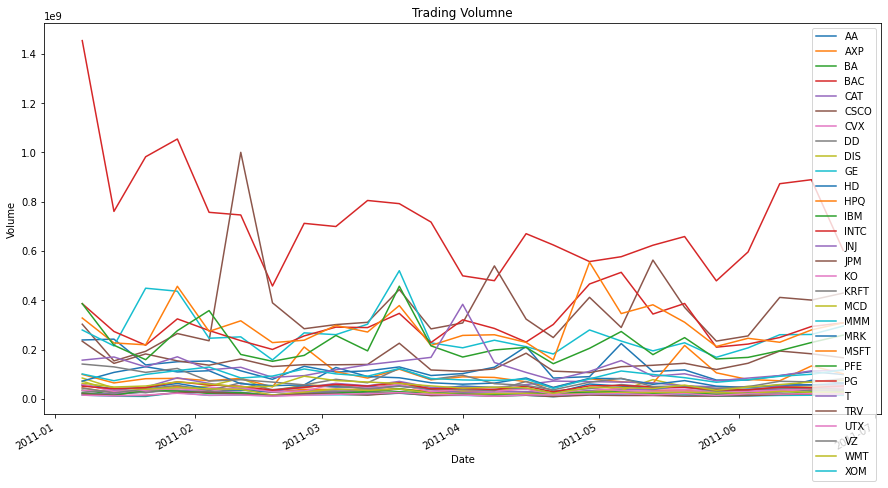

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
for key, data in dji.groupby('stock'):
    data.plot(x='date',y='volume', ax=ax, label=key)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Trading Volumne')

Text(0.5, 1.0, 'Closing Price Time Series')

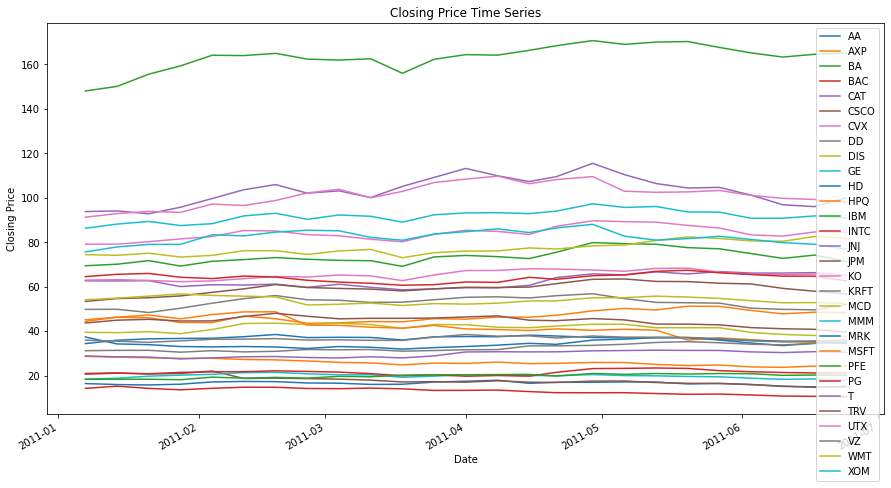

In [20]:
fig, ax = plt.subplots(1,1,figsize=(15,8))
for key, data in dji.groupby('stock'):
    data.plot(x='date', y='close', ax=ax, label=key)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price Time Series')

Text(0.5, 1.0, 'Percent change in Price: TS')

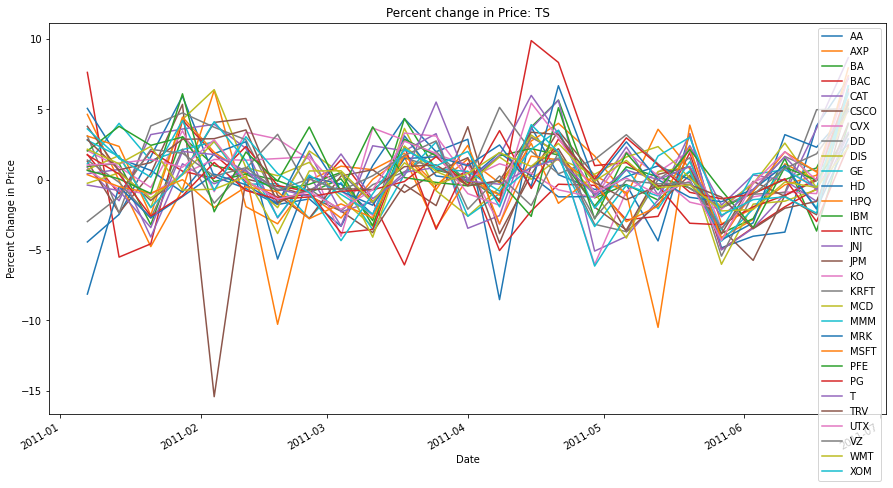

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
for key, data in dji.groupby('stock'):
    data.plot(x='date', y='percent_change_next_weeks_price', ax=ax, label=key)
plt.xlabel('Date')
plt.ylabel('Percent Change in Price')
plt.title('Percent change in Price: TS')

In [22]:
dji.to_csv("dji_clean", index = False)